### Topic Modeling with WordEmbedding


In this notebook, I will try to train topic modeling using word embedding on tweets and see what it leads to.

I will be using this tutorial as a reference: https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6

##### 1. The Data

In [1]:
import pandas as pd

In [2]:
tweets_data = pd.read_parquet('data/tweets.parquet', dtype_backend='pyarrow')

In [3]:
tweets_data.head()

,text,created_at,raw_json
0,size gdp economier member stater east african ...,2023-02-21 14:04:56,"{'created_at': 1676988296.0, 'id': 16280330288..."
1,execution convention apparent colonisation eco...,2023-02-21 14:04:49,"{'created_at': 1676988289.0, 'id': 16280330020..."
2,,2023-02-21 14:04:42,"{'created_at': 1676988282.0, 'id': 16280329704..."
3,today addi heads stater eac icglr reaffirmed s...,2023-02-21 14:04:40,"{'created_at': 1676988280.0, 'id': 16280329619..."
4,,2023-02-21 14:04:33,"{'created_at': 1676988273.0, 'id': 16280329338..."


In [4]:
tweets_data = tweets_data.sort_values(by='created_at', ascending=False)

In [6]:
tweets_data.head(20)

,text,created_at,raw_json
2657980,lumumba kabila simon kimbangu retournent tombe...,2023-06-26 05:00:47,"{'created_at': 1687755647.0, 'id': 16731945755..."
2657981,jules alingete invite devenir denonciateur cri...,2023-06-26 05:00:33,"{'created_at': 1687755633.0, 'id': 16731945140..."
2657982,aucun derive autoritaire lorsqu respecter auto...,2023-06-26 05:00:32,"{'created_at': 1687755632.0, 'id': 16731945092..."
2657983,law chair meeting constitutionally mandate,2023-06-26 05:00:26,"{'created_at': 1687755626.0, 'id': 16731944859..."
2657984,an professeur universite convaincus science,2023-06-26 05:00:17,"{'created_at': 1687755617.0, 'id': 16731944471..."
2657985,lutte antivaleurs gestion public cheval batail...,2023-06-26 05:00:14,"{'created_at': 1687755614.0, 'id': 16731944374..."
2657986,non propriete privee eglis catholique,2023-06-26 05:00:08,"{'created_at': 1687755608.0, 'id': 16731944089..."
2657987,regarder audela beaut femme decouvrez apporte ...,2023-06-26 05:00:01,"{'created_at': 1687755601.0, 'id': 16731943813..."
2657988,ricordate quando daniela santanch offese morti...,2023-06-26 04:59:42,"{'created_at': 1687755582.0, 'id': 16731943022..."
2657989,finaliste travail,2023-06-26 04:59:39,"{'created_at': 1687755579.0, 'id': 16731942893..."


In [7]:
full_tweets = pd.json_normalize(tweets_data.raw_json)

In [8]:
full_tweets.loc[2657980, 'text']

'RT @wembi_steve: #RDC: KASAÏ | 4 personnes sont mortes lors d’un accident de circulation ce Lundi 20 Février 2023 sur la RN1 à Malundju à 1…'

In [9]:
tweets_data.loc[2075, 'raw_json']

{'created_at': 1676983569.0,
 'id': 1628013202108809216,
 'text': 'RT @KipayEnergy: @KipayEnergy développe une centrale solaire à Fungurume, la plus importante en #RDC actuellement.  D’ici avril 2023, elle…'}

In [10]:
tweets_data.loc[2074, 'text']

'tragedie humain joue lest etre expliquee seul presence dun groupe arm cest'

In [11]:
full_tweets.head()

,created_at,id,text
0,1.687756e+09,1673194575509303296,"@wembi_steve @MartinFayulu Lumumba ,Kabila et ..."
1,1.687756e+09,1673194514092023809,RT @radiookapi: RDC : Jules Alingete invite le...
2,1.687756e+09,1673194509293715456,RT @StanysBujakera: #RDC: « Il y a aucune déri...
3,1.687756e+09,1673194485998649346,@jkmuhwezi @UPDFspokespersn Under what law did...
4,1.687756e+09,1673194447138422786,RT @PatrickMuyaya: #RDC : Ils ont tous moins d...


The tweets are not cleanned proprely, before continuing we need to find a better way to clean to clean the tweets before passing it to the bert model, the best option will be to use the little preprocessing because the tweet are being passed to a bert model.

In [12]:
full_tweets.loc[2657985, 'text']

'#RDC🇨🇩: le pays compte mtnant sur la SADC "Ns sommes ds la  phase de renforcer nos relations au niveau régional ave… https://t.co/UFjAgx7pxz'

### Cleaning the tweets

For the normalization, since we are using a language model, we will adopt some basics normalization techniques which evolves removing emojis, replacing URL by URL  and USER mentions by @user. Next we will use the BERT model to tokenize the tweets.

In [13]:
from emoji import demojize
from nltk.tokenize import TweetTokenizer


tokenizer = TweetTokenizer()


def normalize_token(token):
    lowercased_token = token.lower()
    if token.startswith("@"):
        return "@USER"
    elif lowercased_token.startswith("http") or lowercased_token.startswith("www"):
        return "HTTPURL"
    elif len(token) == 1:
        return demojize(token)
    else:
        if token == "’":
            return "'"
        elif token == "…":
            return "..."
        else:
            return token


def normalize_tweet(tweet):
    tokens = tokenizer.tokenize(tweet.replace("’", "'").replace("…", "..."))
    normalized_tweets = " ".join([normalize_token(token) for token in tokens])

    normalized_tweets = (
        normalized_tweets.replace("cannot ", "can not ")
        .replace("n't ", " n't ")
        .replace("n 't ", " n't ")
        .replace("ca n't", "can't")
        .replace("ai n't", "ain't")
    )
    normalized_tweets = (
        normalized_tweets.replace("'m ", " 'm ")
        .replace("'re ", " 're ")
        .replace("'s ", " 's ")
        .replace("'ll ", " 'll ")
        .replace("'d ", " 'd ")
        .replace("'ve ", " 've ")
    )
    normalized_tweets = (
        normalized_tweets.replace(" p . m .", "  p.m.")
        .replace(" p . m ", " p.m ")
        .replace(" a . m .", " a.m.")
        .replace(" a . m ", " a.m ")
    )
    normalized_tweets = (normalized_tweets
                         .lower()
                         .replace("drc", "")
                         .replace("rdc", "")
                         .replace("rdcongo", "")
                        .replace("drcongo", ""))

    return " ".join(normalized_tweets.split())

In [14]:
normalize_tweet(full_tweets.loc[2657986, 'text'])

'rt @user : # : #kinshasa . recrudescence du phénomène kuluna à kitambo hôpital . httpurl'

In [15]:
full_tweets.loc[2657986, 'text']

'RT @ebalemozindo: #RDC: #KINSHASA. \nRecrudescence du phénomène Kuluna à  Kitambo Hôpital. https://t.co/e0A5bnXkLJ'

### Encoding.

To learn the vector representation of our tweets we will be using the BERT model, but instead of using the main bert model, we will be using the bert model that was trained on a corpus of french tweets since most of our target tweets are from French. `Yanzhu/bertweetfr-base`. is the model we will be using.

In [16]:
from sentence_transformers import SentenceTransformer

In [17]:
model = SentenceTransformer('Yanzhu/bertweetfr-base')

No sentence-transformers model found with name /Users/esp.py/.cache/torch/sentence_transformers/Yanzhu_bertweetfr-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /Users/esp.py/.cache/torch/sentence_transformers/Yanzhu_bertweetfr-base were not used when initializing CamembertModel: ['lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertModel were not initialize

In [68]:
full_tweets['created_at'] = pd.to_datetime(full_tweets['created_at'], unit='s')

In [79]:
### collecting tweets from the max day in the dataframe
from datetime import datetime, timedelta

last_day_tweets = full_tweets[full_tweets.created_at.dt.date == (full_tweets.created_at.dt.date.max())]


In [81]:
last_day_tweets.shape

(1547, 3)

In [82]:
last_day_tweets['cleaned_text'] = last_day_tweets['text'].apply(normalize_tweet)

/var/folders/ds/0g69mdw97cq_0bt80x0f_s240000gn/T/ipykernel_10563/3118379516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_day_tweets['cleaned_text'] = last_day_tweets['text'].apply(normalize_tweet)


In [83]:
last_day_tweets

,created_at,id,text,cleaned_text
0,2023-06-26 05:00:47,1673194575509303296,"@wembi_steve @MartinFayulu Lumumba ,Kabila et ...","@USER @USER Lumumba , Kabila et Simon kimbangu..."
1,2023-06-26 05:00:33,1673194514092023809,RT @radiookapi: RDC : Jules Alingete invite le...,RT @USER : RDC : Jules Alingete invite les Con...
2,2023-06-26 05:00:32,1673194509293715456,RT @StanysBujakera: #RDC: « Il y a aucune déri...,RT @USER : #RDC : « Il y a aucune dérive autor...
3,2023-06-26 05:00:26,1673194485998649346,@jkmuhwezi @UPDFspokespersn Under what law did...,@USER @USER Under what law did you chair that ...
4,2023-06-26 05:00:17,1673194447138422786,RT @PatrickMuyaya: #RDC : Ils ont tous moins d...,RT @USER : #RDC : Ils ont tous moins de 35 ans...
...,...,...,...,...
1542,2023-06-26 00:00:30,1673119005521879040,RT @Presidence_RDC: #RDC 25.06.2023|#MbujiMayi...,RT @USER : #RDC 25.06 . 2023 | #MbujiMayi Voic...
1543,2023-06-26 00:00:30,1673119005488340995,RT @Presidence_RDC: #RDC 25.06.2023|#MbujiMayi...,RT @USER : #RDC 25.06 . 2023 | #MbujiMayi Voic...
1544,2023-06-26 00:00:28,1673118998022569984,RT @Presidence_RDC: #RDC 25.06.2023|#MbujiMayi...,RT @USER : #RDC 25.06 . 2023 | #MbujiMayi Voic...
1545,2023-06-26 00:00:21,1673118966099726336,@Gaston_Ndjulu @BenitaNtumba @Alix_rdc @August...,@USER @USER @USER @USER @USER @USER L'église a...


In [84]:
today_tweets_embeddings = model.encode(last_day_tweets['cleaned_text'], show_progress_bar=True)

Batches:   0%|          | 0/49 [00:00<?, ?it/s]

In [85]:
today_tweets_embeddings.shape

(1547, 768)

with the encoding done, we can move to the next step which is the clustering.

Before applying the clustering, we will use the umap-learn algorithm.

In [93]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=10, 
                            metric='cosine').fit_transform(today_tweets_embeddings)

In [92]:
umap_embeddings.shape

(1547, 5)

We used umap dimensionality reduction algorithm to reduce the dimension of our data to 5 this will help us to visualize the data.

In [99]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=5,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

In [100]:
cluster

HDBSCAN()

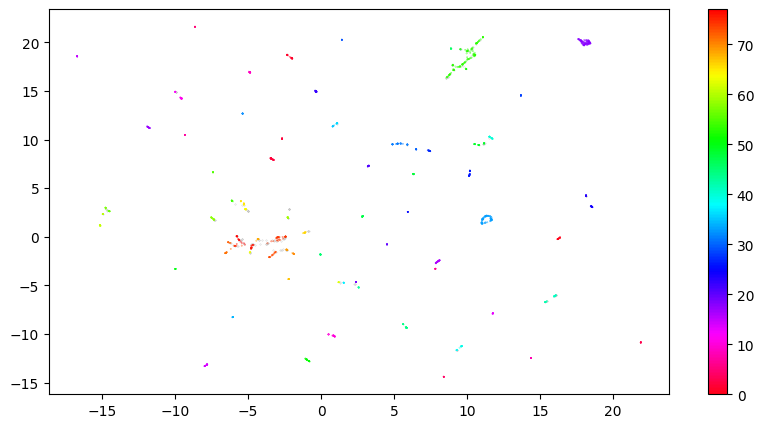

In [102]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(umap_embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(10, 5))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [103]:
result

,x,y,labels
0,-1.104626,0.426130,66
1,-7.443626,1.891957,58
2,5.863286,-9.352063,44
3,10.017583,19.110346,53
4,-2.217064,-4.357670,67
...,...,...,...
1542,-9.566066,14.233283,11
1543,-9.566220,14.231546,11
1544,-9.545110,14.218253,11
1545,-6.505422,-1.636243,71


In [105]:
docs_df = pd.DataFrame(last_day_tweets, columns=["cleaned_text"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'cleaned_text': ' '.join})

In [106]:
docs_per_topic

,Topic,cleaned_text
0,-1,RT @USER : La lutte contre les antivaleurs dan...
1,0,RT @USER : :police_car_light: NEW AIRDROP ALER...
2,1,RT @USER : @USER @USER @USER @USER @USER @USER...
3,2,@USER @USER @USER @USER @USER @USER @USER @USE...
4,3,RT @USER : :police_car_light: NEW AIRDROP ALER...
...,...,...
74,73,@USER @USER Ce n'est pas moi l'auteur de la ph...
75,74,RT @USER : #RDC Qu'on se disent la vérité . Pl...
76,75,"@USER @USER On est concerné mais , cela nous c..."
77,76,"@USER Il est trop émotifs et sentimentale , un..."


In [109]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.cleaned_text.values, m=len(last_day_tweets))

In [113]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .cleaned_text
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "cleaned_text": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
0,-1,169
54,53,133
19,18,94
34,33,74
3,2,43
75,74,34
32,31,30
23,22,29
52,51,28
27,26,28


In [121]:
top_n_words[2][:10]

[('httpurl', 0.10521642329235549),
 ('jajajajaja', 0.020231605648961613),
 ('drcfailedstate', 0.020231605648961613),
 ('mmmmmmm', 0.020231605648961613),
 ('tout', 0.009400130076718293),
 ('et', 0.004870864317980028),
 ('fdlr_foca', 0.0),
 ('fbi', 0.0),
 ('fcc', 0.0),
 ('fcci', 0.0)]

We can see that we don't get the results we were expecting at the first try we can do better.

We need to improve our cleaning and understand the algorithm we are using better.

-  Giving up on this, let me finsish the other project on machine translation and come back to this later.

When I come back the main work will be to finetune distilbert on the tweets embedding to learn contextualized embedding related to my data.